In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# Path to the downloaded CSV file
file_path = r'C:\Users\Lenovo\Downloads\archive\spam.csv'

# List of common encodings to try
encodings = ['latin1', 'ISO-8859-1', 'cp1252']

# Attempt to load the file with different encodings
for encoding in encodings:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        print(f"Loaded with encoding: {encoding}")
        print(data.head())
        break
    except Exception as e:
        print(f"Failed with encoding: {encoding}. Error: {e}")

Loaded with encoding: latin1
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [11]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
# Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for clarity
data_cleaned.columns = ['label', 'message']

# Display the cleaned DataFrame
print(data_cleaned.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data_cleaned['message']  # Features
y = data_cleaned['label']    # Target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Display the sizes of the resulting sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 4457
Test set size: 1115


In [19]:
X_train = X_train.str.lower()
X_test = X_test.str.lower()

In [20]:
X_train.head()

1978    no i'm in the same boat. still here at my moms...
3989    (bank of granite issues strong-buy) explosive ...
3935       they r giving a second chance to rahul dengra.
4078       o i played smash bros  &lt;#&gt;  religiously.
4086    private! your 2003 account statement for 07973...
Name: message, dtype: object

In [21]:
y_train = y_train.map({'ham': 0, 'spam': 1})
y_test = y_test.map({'ham': 0, 'spam': 1})

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

In [24]:
# Fit and transform the training data
X_train_counts = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_counts = vectorizer.transform(X_test)

In [25]:
X_train_counts 

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [27]:
# Convert the sparse matrix to a dense array
X_train_dense = X_train_counts.toarray()

# Print the first document's word counts
print(X_train_dense[0])

[0 0 0 ... 0 0 0]


<Figure size 864x432 with 0 Axes>

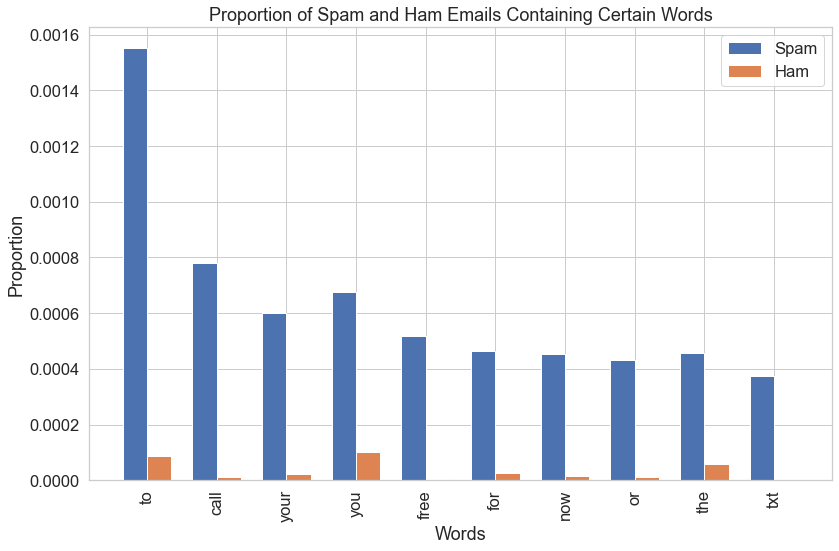

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert the sparse matrix to a dense array
X_train_dense = X_train_counts.toarray()

# Create DataFrame for easier analysis
df = pd.DataFrame(X_train_dense, columns=vectorizer.get_feature_names())
df['label'] = y_train.values

# Compute proportions for each class
spam_proportion = df[df['label'] == 1].drop('label', axis=1).mean()
ham_proportion = df[df['label'] == 0].drop('label', axis=1).mean()

# Calculate proportion of spam and ham emails containing each word
proportion_spam = spam_proportion / (df['label'] == 1).sum()
proportion_ham = ham_proportion / (df['label'] == 0).sum()

# Select top features with different proportions
top_features = np.abs(proportion_spam - proportion_ham).nlargest(10).index

# Plotting
plt.figure(figsize=(12, 6))
x = np.arange(len(top_features))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, proportion_spam[top_features], width, label='Spam')
rects2 = ax.bar(x + width/2, proportion_ham[top_features], width, label='Ham')

ax.set_xlabel('Words')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Spam and Ham Emails Containing Certain Words')
ax.set_xticks(x)
ax.set_xticklabels(top_features, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Download the NLTK stop words if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [32]:

# Apply stop word removal to the training and test data
X_train_cleaned = X_train.apply(remove_stop_words)
X_test_cleaned = X_test.apply(remove_stop_words)




In [34]:
X_train_cleaned

1978    'm boat . still moms . check yo . 'm half naked .
3989    ( bank granite issues strong-buy ) explosive p...
3935                r giving second chance rahul dengra .
4078      played smash bros & lt ; # & gt ; religiously .
4086    private ! 2003 account statement 07973788240 s...
                              ...                        
3772    came hostel . going sleep . plz call class . h...
5191                               sorry , 'll call later
5226    prabha .. 'm soryda .. realy .. frm heart 'm sory
5390                             nt joking seriously told
860                                    work . going min .
Name: message, Length: 4457, dtype: object

In [37]:
import string
# Function to remove stop words and punctuation
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words and punctuation
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]
    return ' '.join(filtered_words)

# Apply preprocessing to the training and test data
X_train_cleaned = X_train.apply(preprocess_text)
X_test_cleaned = X_test.apply(preprocess_text)

In [38]:
X_train_cleaned

1978            'm boat still moms check yo 'm half naked
3989    bank granite issues strong-buy explosive pick ...
3935                  r giving second chance rahul dengra
4078                  played smash bros lt gt religiously
4086    private 2003 account statement 07973788240 sho...
                              ...                        
3772        came hostel going sleep plz call class hrishi
5191                                 sorry 'll call later
5226    prabha .. 'm soryda .. realy .. frm heart 'm sory
5390                             nt joking seriously told
860                                        work going min
Name: message, Length: 4457, dtype: object

In [39]:

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train_cleaned)
X_test_counts = vectorizer.transform(X_test_cleaned)

# Convert the sparse matrix to a dense array
X_train_dense = X_train_counts.toarray()
X_test_dense = X_test_counts.toarray()

In [40]:
# Assuming X_train_cleaned contains the cleaned email messages and y_train contains the labels

# Calculate lengths of emails
email_lengths = X_train_cleaned.apply(len)

# Create a DataFrame with lengths and labels
lengths_df = pd.DataFrame({
    'length': email_lengths,
    'label': y_train
})


In [41]:
# Split into spam and ham
spam_lengths = lengths_df[lengths_df['label'] == 1]['length']
ham_lengths = lengths_df[lengths_df['label'] == 0]['length']


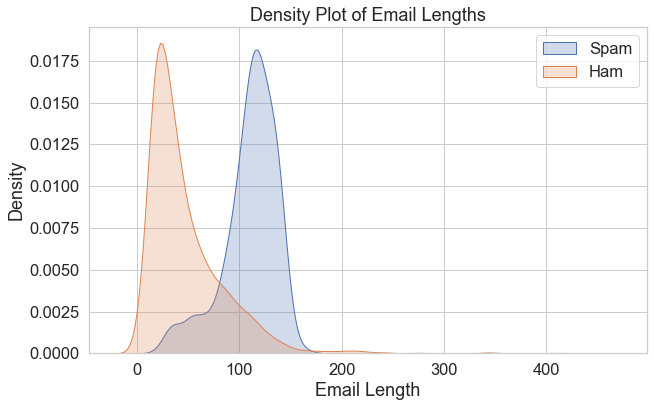

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(spam_lengths, label='Spam', shade=True)
sns.kdeplot(ham_lengths, label='Ham', shade=True)
plt.title('Density Plot of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Density')
plt.legend()
plt.show()


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [44]:
# Assuming X_train_cleaned and X_test_cleaned are already preprocessed
# and you have already removed stop words from the messages

# Reuse vectorizer with stop words removal
vectorizer = CountVectorizer(stop_words='english')

# Vectorize the cleaned training and test data
X_train_counts = vectorizer.fit_transform(X_train_cleaned)
X_test_counts = vectorizer.transform(X_test_cleaned)

In [45]:
# Initialize and fit the model
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Make predictions
y_pred = clf.predict(X_test_counts)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [47]:
msg = "Congratulations! You've won a $1000 gift card. Click the link below to claim your prize. Act fast, this offer is only valid for the next 24 hours. Don't miss out!"

In [48]:
msg = vectorizer.transform(msg)

ValueError: Iterable over raw text documents expected, string object received.

In [49]:
# Example message
msg = "Congratulations! You've won a $1000 gift card. Click the link below to claim your prize. Act fast, this offer is only valid for the next 24 hours. Don't miss out!"

# Function to preprocess the message (assuming you have used this earlier)
def preprocess_text(text):
    # Apply the same preprocessing steps as you did on training data
    # Example: lowercasing, removing punctuation, etc.
    return text.lower()  # Add more preprocessing if needed

# Preprocess the message
processed_msg = preprocess_text(msg)

# Transform the message using the existing CountVectorizer
msg_vectorized = vectorizer.transform([processed_msg])

# Predict the class using the trained model
prediction = clf.predict(msg_vectorized)

# Output the result
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")


Prediction: Spam


In [52]:
def classify_message(message):
    # Preprocess the message (convert to lowercase, remove punctuation, etc.)
    message_cleaned = preprocess_text(message)
    
    # Transform the message using the trained vectorizer
    message_vectorized = vectorizer.transform([message_cleaned])
    
    # Predict using the trained model
    prediction = clf.predict(message_vectorized)
    
    # Output the prediction
    return 'spam' if prediction[0] == 1 else 'ham'

In [53]:
msg_spam = "Hi there! I just wanted to check in and see how you're doing. Let's catch up sometime soon. Maybe we can grab coffee next week. Let me know what your schedule looks like."
print(classify_message(msg_ham))

ham


In [54]:
# Example ham message
msg_ham = "Hi there! I just wanted to check in and see how you're doing. Let's catch up sometime soon. Maybe we can grab coffee next week. Let me know what your schedule looks like."

# Classify the message
print(classify_message(msg_ham))

ham


In [55]:
msg_spam1 = "Congratulations! You've won a $1000 gift card. Click the link below to claim your prize. Act fast, this offer is only valid for the next 24 hours. Don't miss out!"
msg_spam2 = "Get paid to work from home! No experience needed. Click here to start earning money today. Sign up now!"
msg_spam3 = "Urgent: Your account has been compromised. Please click the link below to verify your identity and secure your account immediately."
msg_spam4 = "Exclusive deal just for you! Buy one get one free on all items. Limited time offer. Click here to shop now and save big!"
msg_spam5 = "Don't miss out on this limited-time offer! Get your free trial of our premium service today. Cancel anytime, no commitment required."

In [56]:
msg_ham1 = "Hi there! I just wanted to check in and see how you're doing. Let's catch up sometime soon. Maybe we can grab coffee next week. Let me know what your schedule looks like."
msg_ham2 = "Hey, I saw your post about the new project. That sounds exciting! Would love to hear more about it when you have time."
msg_ham3 = "Just wanted to let you know that the meeting has been rescheduled to 2 PM tomorrow. Hope that works for you."
msg_ham4 = "Thanks for sending over the report. I reviewed it and have a few questions. Can we discuss this over a call?"
msg_ham5 = "I hope you’re having a great day! Just a quick reminder about our lunch plans tomorrow. Looking forward to it!"

In [57]:
print(classify_message(msg_ham1))
print(classify_message(msg_ham2))
print(classify_message(msg_ham3))
print(classify_message(msg_ham4))
print(classify_message(msg_ham5))

ham
ham
ham
ham
ham


In [58]:
print(classify_message(msg_spam1))
print(classify_message(msg_spam2))
print(classify_message(msg_spam3))
print(classify_message(msg_spam4))
print(classify_message(msg_spam5))

spam
ham
spam
ham
spam
